In [27]:
import os

import pandas as pd
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline

import itertools

In [28]:
# 실습용 데이터 패키지
from sklearn.datasets import load_boston

# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 평가 패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [29]:
import pandas as pd
data = pd.read_csv('Bike Sharing Data.csv')

## 상관관계

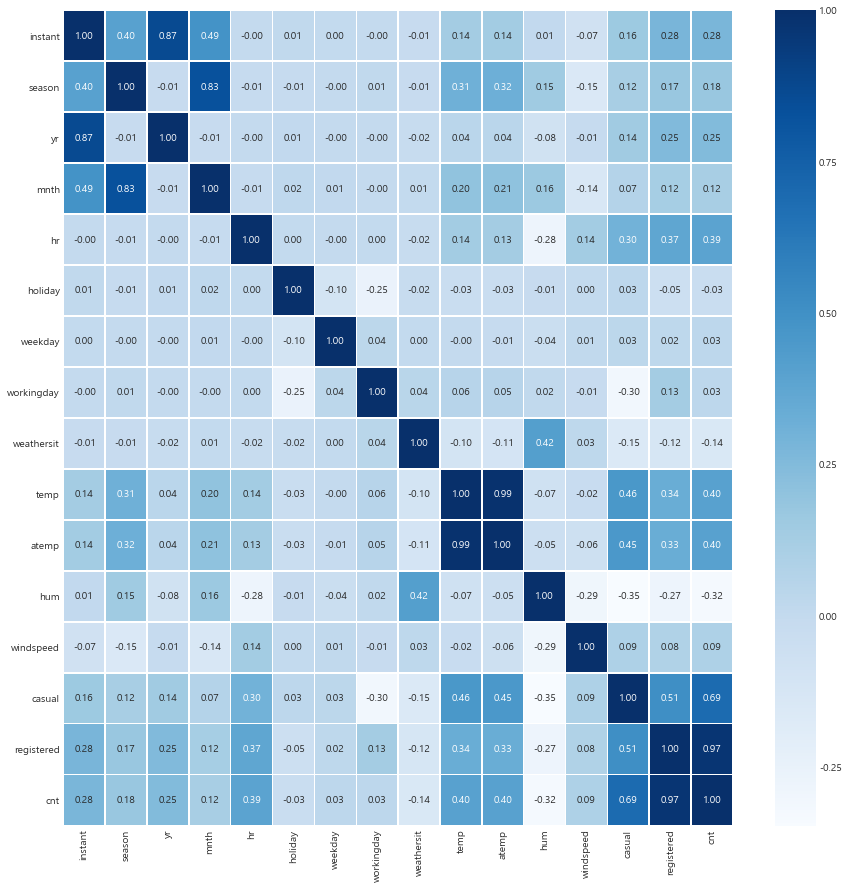

In [30]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=data.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [31]:
data['dteday']=data.dteday.apply(pd.to_datetime)
data['day']=data.dteday.apply(lambda X : X.day)
drop_columns=['dteday', 'instant', 'casual', 'registered', 'atemp']
data.drop(drop_columns, axis=1, inplace=True)

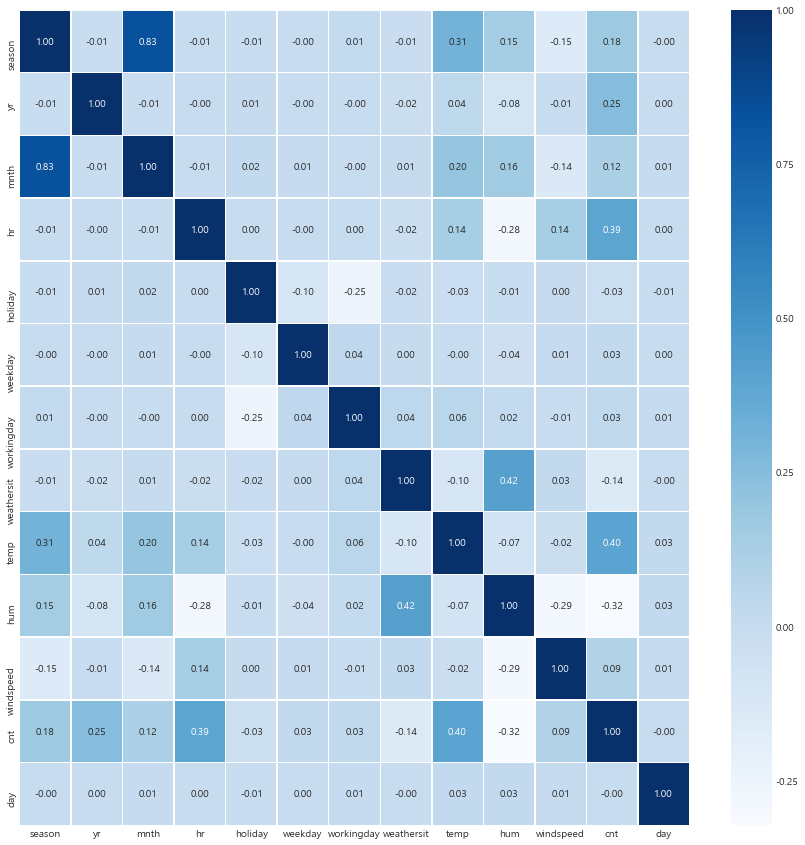

In [32]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=data.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [33]:
data

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16,1
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40,1
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32,1
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13,1
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1,1
5,1,0,1,5,0,6,0,2,0.24,0.75,0.0896,1,1
6,1,0,1,6,0,6,0,1,0.22,0.80,0.0000,2,1
7,1,0,1,7,0,6,0,1,0.20,0.86,0.0000,3,1
8,1,0,1,8,0,6,0,1,0.24,0.75,0.0000,8,1
9,1,0,1,9,0,6,0,1,0.32,0.76,0.0000,14,1


In [34]:
data_columns=data.columns
data_columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'day'],
      dtype='object')

In [35]:
data_shape=data.shape
data_shape

(17379, 13)

In [36]:
# 데이터 프레임 형태로 변환
X = data.drop(['cnt'], axis=1, inplace=False)
y = data['cnt']

In [37]:
X

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,day
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,1
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,1
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,1
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,1
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1
5,1,0,1,5,0,6,0,2,0.24,0.75,0.0896,1
6,1,0,1,6,0,6,0,1,0.22,0.80,0.0000,1
7,1,0,1,7,0,6,0,1,0.20,0.86,0.0000,1
8,1,0,1,8,0,6,0,1,0.24,0.75,0.0000,1
9,1,0,1,9,0,6,0,1,0.32,0.76,0.0000,1


In [38]:
y

0         16
1         40
2         32
3         13
4          1
5          1
6          2
7          3
8          8
9         14
10        36
11        56
12        84
13        94
14       106
15       110
16        93
17        67
18        35
19        37
20        36
21        34
22        28
23        39
24        17
25        17
26         9
27         6
28         3
29         2
        ... 
17349    125
17350    102
17351     72
17352     47
17353     36
17354     49
17355     34
17356     19
17357     11
17358      1
17359      3
17360      9
17361     40
17362     85
17363    196
17364    157
17365    120
17366    157
17367    224
17368    203
17369    247
17370    315
17371    214
17372    164
17373    122
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [39]:
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,day
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,1
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,1
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,1
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,1
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


In [40]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

## train data, test data 분리

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

## 최소제곱법을 통한 다중선형회귀 fitting

In [42]:
X_train = sm.add_constant(X_train)
model=sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

## QQ plot

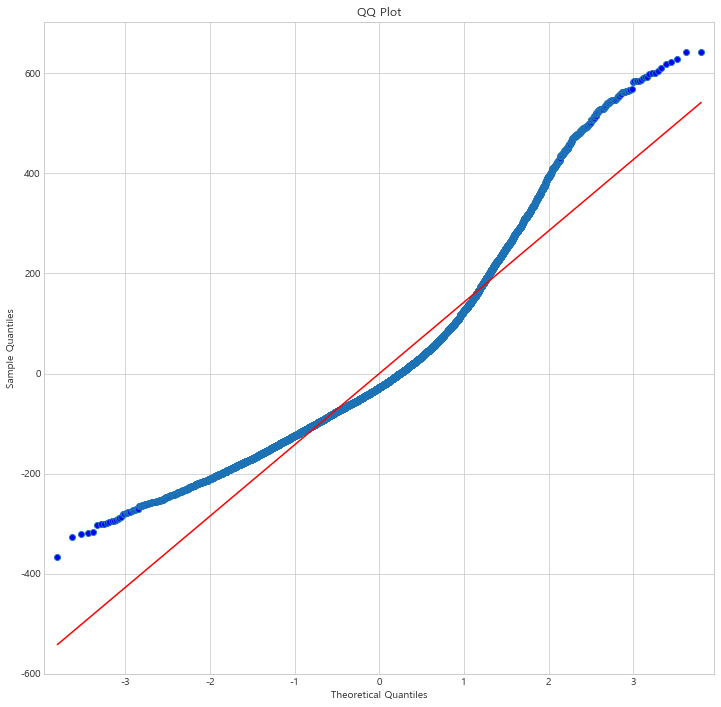

In [43]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

## Residual

[Text(0,0.5,'Residuals'), Text(0.5,0,'Fitted values')]

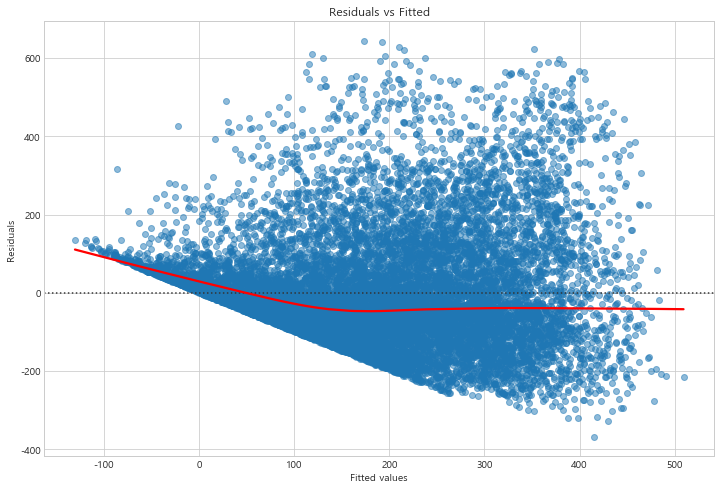

In [44]:
model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

## 통계 summary

In [45]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     730.0
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:32:37   Log-Likelihood:                -88682.
No. Observations:               13903   AIC:                         1.774e+05
Df Residuals:                   13890   BIC:                         1.775e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.1454      7.876     -1.288      0.1

# 로그함수변환

In [21]:
y_log = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.2, random_state = 2021)
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis = 1)
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     1084.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:38:59   Log-Likelihood:                -20003.
No. Observations:               13903   AIC:                         4.003e+04
Df Residuals:                   13890   BIC:                         4.013e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6756      0.056     47.473      0.0

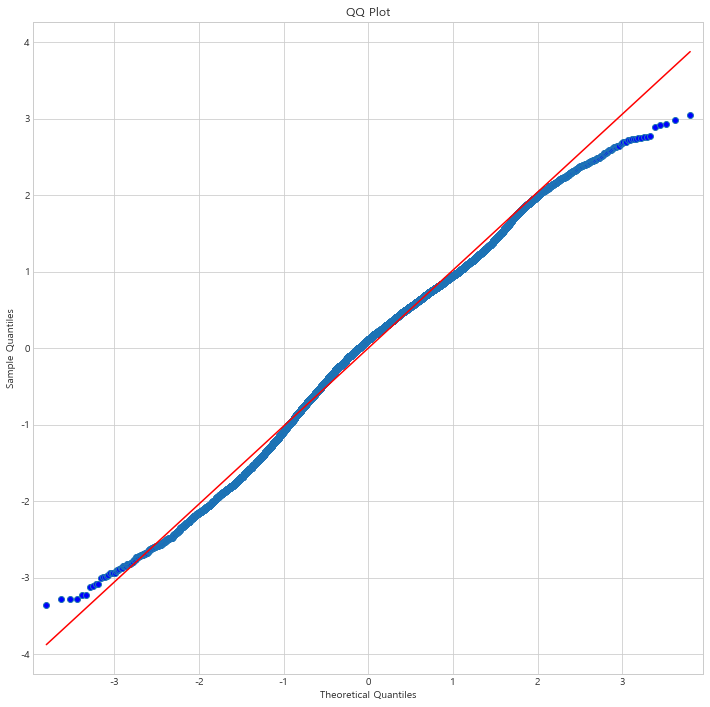

In [22]:
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False # 음수 폰트 깨짐 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

[Text(0,0.5,'Residuals'), Text(0.5,0,'Fitted values')]

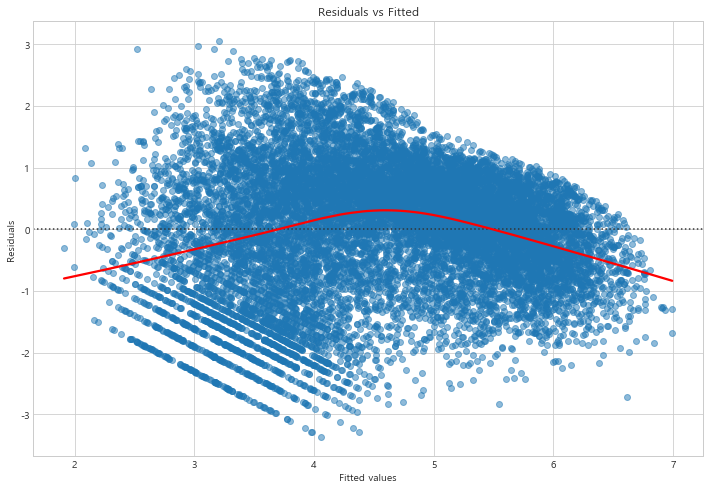

In [23]:
model_fitted_y= model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5}, 
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

In [24]:
model = sm.OLS(y_train, X_train.drop(['mnth', 'weathersit', 'day'], axis=1))
model_trained = model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     1445.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:39:52   Log-Likelihood:                -20004.
No. Observations:               13903   AIC:                         4.003e+04
Df Residuals:                   13893   BIC:                         4.010e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6599      0.055     48.686      0.0

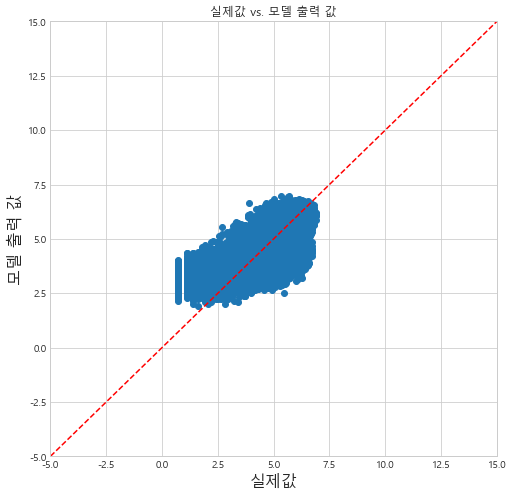

In [26]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize=(8, 8))
plt.title('실제값 vs. 모델 출력 값')
plt.scatter(y_train, y_train_pred)
plt.plot([-5, 15], [-5, 15], ls="--", c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 출력 값', size=16)
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.show()

## 예측정확도

In [71]:
X_test = sm.add_constant(X_test)

In [72]:
y_test_pred = model_trained.predict(X_test.drop(['mnth', 'weathersit', 'day'], axis=1))
y_test_pred.head()

8619     4.736068
11157    3.919427
2146     3.821214
6367     5.358904
12468    6.244082
dtype: float64

In [73]:
print(mean_squared_error(y_test, y_test_pred))

1.0207755414829311


In [74]:
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

1.0103343711281583


In [75]:
print(mean_absolute_error(y_test, y_test_pred))

0.7929871671519837


In [76]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

print(mean_absolute_percentage_error(y_test, y_test_pred))

26.11448024058427


In [77]:
print(r2_score(y_test, y_test_pred))

0.48767176272779356


In [78]:
print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, y_train_pred)))

Training MSE: 1.041
Training RMSE: 1.020
Training MAE: 0.811
Training MAPE: 26.460
Training R2: 0.484


In [79]:
print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, y_test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, y_test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, y_test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, y_test_pred)))

Testing MSE: 1.021
Testing RMSE: 1.010
Testing MAE: 0.793
Testing MAPE: 26.114
Testing R2: 0.488
